In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from dateutil.parser import parse
from datetime import timedelta
from tqdm import tqdm

In [2]:
data = pd.read_csv("Record File__0mA(29s)~30mA(1s)(통합).csv") #통합 데이터
data.describe()

,Voltage(V),Current(A),Resistance(Ohm),Power(W)
count,4.988486e+06,4.988486e+06,4.988486e+06,4.988486e+06
mean,3.889299e+00,9.340380e-04,1.300571e+04,3.475257e-03
std,3.141821e-02,5.146647e-03,5.870463e+04,1.871865e-02
min,1.680000e-02,-1.500000e-03,0.000000e+00,0.000000e+00
25%,3.888700e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.894900e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.899500e+00,0.000000e+00,1.219480e+02,0.000000e+00
max,3.907000e+00,1.399000e+00,6.489843e+05,1.340000e-01


In [3]:
data = data.iloc[:, :3] #.values

```
date_ = np.array([])
for i in data['Time'].values:
    i = i.replace("오전", "AM")
    i = i.replace("오후", "PM")
    date_ = np.append(date_, np.array([i]))
    
date__ = np.array([])
for i in date_:
    date__ = np.append(date__, np.array([i]))
    
date___ = np.array([])
for i in date__:
    tmp = i[1]
    i[1] = i[2]
    i[2] = tmp
    date___ = np.append(date___, np.array([i]))
    
parsing_date = np.array([])
for i in tqdm(date___):
    #print('parsing: ', i, "=", (" ").join(i))
    dt = parse((" ").join(i)) #list to string
    #print(dt)
    #print()
    parsing_date = np.append(parsing_date, np.array([dt]))
```

In [6]:
date_=[] #replace korean to english

for i in data['Time'].values:
    i = i.replace("오전", "AM")
    i = i.replace("오후", "PM")
    date_.append(i)

In [7]:
date__=[] #split blank

for i in date_:
    date__.append(i.split(" "))

In [8]:
date___=[] #switch index

for i in date__:
    tmp = i[1]
    i[1] = i[2]
    i[2] = tmp
    date___.append(i)

In [9]:
parsing_date=[]

for i in tqdm(date___):
    #print('parsing: ', i, "=", (" ").join(i))
    dt = parse((" ").join(i)) #list to string
    #print(dt)
    #print()
    parsing_date.append(dt)

100%|█████████████████████████████████████████████████████████████████████| 4988486/4988486 [08:07<00:00, 10227.05it/s]


### 찾아야 하는 것들
1. 통신 직전의 전압 인덱스 
    - 전류가 0.020 < current (<= 0.035)인 인덱스의 전 인덱스
    ```
    comm = np.where(data['Current(A)'] > 0.020)[0] #통신
    # 0.020 초과인 인덱스
    ```
    
    - 전압 확인 (기준 전압)
    ```
        
    ```
    - 인덱스 확인
    ```
    criteria = comm - 1 #통신 직전 전압의 인덱스를 알기 위함
    ```
2. 통신 전압
    - 전류가 0.020 < current인 인덱스
    ```
    comm = np.where(data['Current(A)'] > 0.020)[0]
    ```
    - 전압 확인 (최저 전압 확인)
    ```
    comm = np.delete(comm, np.where(data['Voltage(V)'] < 2.000))
    ```
    - 인덱스 확인
    - 통신 전압이 기준 전압의 얼마만큼을 소비했는가
    ```
    #pre 기준 전압의 인덱스
    
    ```
3. 통신 후 전압
    - (기준 전압 - 현재 전압) * 100
    - 전압 회복률 
    - 회복 기준이 0.5인 곳이 회복 시간이라고 하자면 시간
    ```
    #시간과 전압, 전압 회복률 저장
    ```
4. 전압 회복 시간
    - 그래프를 그려서 확인해볼 것
    ```
    #시간과 전압, 전압 회복률 저장
    ```

In [150]:
comm_A = np.where(data['Current(A)'] > 0.020)

In [153]:
comm_V_ = np.where(data['Voltage(V)'] < 2.000)

In [154]:
comm_V = np.array(comm_V_).reshape(len(comm_V_[0]))

In [156]:
# comm_ = np.delete(np.where(data['Current(A)'] > 0.020), np.where(np.where(data['Current(A)'] > 0.020) == i for i in np.array(np.where(data['Voltage(V)'] < 2.000))))

In [164]:
comm_ = comm_A

for i in comm_V:
    comm_ = np.delete(comm_, np.where(comm_ == i))

In [165]:
comm_

array([    132,     133,     268, ..., 4988382, 4988383, 4988384],
      dtype=int64)

In [166]:
comm = np.array([comm_[0]])

for idx in range(int(len(comm_)-1)):
#     print("index", idx, "i", comm_[idx])
#     print("index+1", idx+1, "i", comm_[idx+1])
    if comm_[idx]+1 != comm_[idx+1]:
#         print("index+1", idx+1, "i", comm_[idx+1])
#         print(comm)
        comm = np.append(comm, np.array(comm_[idx+1]))
#         print(comm)

In [167]:
comm

array([    132,     268,     401, ..., 4988164, 4988274, 4988381],
      dtype=int64)

In [168]:
criterion = comm - 1

In [169]:
criterion

array([    131,     267,     400, ..., 4988163, 4988273, 4988380],
      dtype=int64)

In [172]:
recovery_time=np.zeros((1,2)) #시간은 통신 전, 회복(crit) 시간
recovery_rate=np.zeros((1,2)) #통신(최대), crit(0.5 or smaller)
recovery_volt=np.zeros((1,3)) #통신전, 통신(최소), 회복

crit = 0.50

for _, i in enumerate(tqdm(criterion)): #기준 전압
    r = np.array([])
    v = np.array([])
    
    for j in range(int(len(data['Voltage(V)']))):
#         print("crit", i, "current", i+j+1)
#         print("crit", data['Voltage(V)'][i], "current", data['Voltage(V)'][j+i+2])
        
        rate = (data['Voltage(V)'][i] - data['Voltage(V)'][i+j+1]) * 100 #(기준전압 - 현재전압)*100
        r = np.append(r, np.array([rate]))
        v = np.append(v, np.array([data['Voltage(V)'][i+j+1]]))
        
#         print("rate", rate)
#         print("recovery_rate", recovery_rate)
        
        if rate <= crit: #회복 전압
            recovery_rate = np.append(recovery_rate, np.array([np.max(r), rate]).reshape(1,2), axis=0)
            
            recovery_time = np.append(recovery_time, np.array([parsing_date[i], parsing_date[i+j]]).reshape(1,2), axis=0)
            
            recovery_volt = np.append(recovery_volt, np.array([data['Voltage(V)'][i], np.min(v), data['Voltage(V)'][i+j+1]]).reshape(1,3), axis=0)
            break
            
recovery_rate = np.delete(recovery_rate, 0, 0)
recovery_time = np.delete(recovery_time, 0, 0)
recovery_volt = np.delete(recovery_volt, 0, 0)

100%|███████████████████████████████████████████████████████████████████████████| 59559/59559 [02:03<00:00, 481.94it/s]


In [194]:
recovery_rate.shape[0] - 3

59556

In [209]:
criterion[59556]

4988163

In [225]:
r = np.array([])
v = np.array([])

for i in range(10):
    print((data['Voltage(V)'][criterion[59556]] - data['Voltage(V)'][criterion[59556]+i+1]) * 100)
    rate = (data['Voltage(V)'][criterion[59556]] - data['Voltage(V)'][criterion[59556]+i+1]) * 100
    print((data['Voltage(V)'][criterion[59556]] - data['Voltage(V)'][criterion[59556]+i+1]) * 100)
    r = np.append(r, np.array([rate]))
    v = np.append(v, np.array([data['Voltage(V)'][criterion[59556]+i+1]]))
    
    if rate <= 0.5:
        break

0.0
0.0


In [222]:
v

array([3.884])

In [215]:
data['Voltage(V)'][criterion[59556]+5]

3.8714

In [195]:
recovery_rate[59556]

array([0., 0.])

In [173]:
recovery_rate

array([[ 8.48,  0.5 ],
       [ 8.44,  0.25],
       [ 8.46,  0.33],
       ...,
       [ 0.  ,  0.  ],
       [20.02,  0.5 ],
       [20.2 ,  0.4 ]])

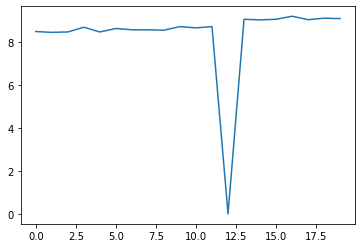

In [175]:
plt.plot(np.max(recovery_rate[:20], axis=1))

In [202]:
str(recovery_time[59556][0])

'2021-10-15 13:51:57'

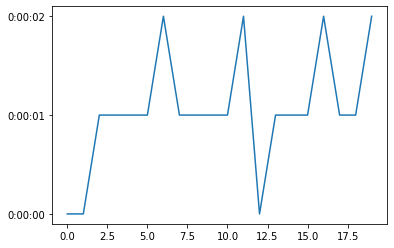

In [176]:
re_time = []

for i in recovery_time:
    re_time.append(str(i[1] - i[0]))
    
plt.plot(re_time[:20])

In [197]:
recovery_volt[59556]

array([3.884, 3.884, 3.884])

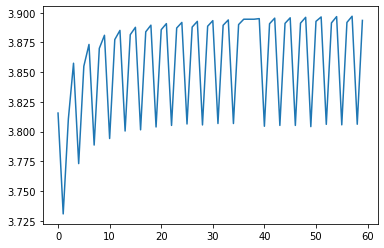

In [177]:
plt.plot(recovery_volt[:20].flatten())